**Visualization of Results**

BAMP 2022 - MCT 4 - Ante Jelavic, Franziskus Perkhofer, Manuel Mencher, Melissa Ewering, Tim Ritzheimer

Short Description: In the previous script "SentimentAnalysis" the collected tweets were assigned to three different topics according to used hastags (Corona, Brexit, ESG) and all tweets were analyzed towards sentiment and emotions. Those results were togehter with demographics and the tweet data merged into the file "FinalResults.csv". This file contains now all results of this use case / proof of concept. This scipt will be based on this data and visualize it in an appealing way to make the information easy digestable and tangible. 

In [1]:
# Loading all necessary packages

# For displaying the data after
import pandas as pd
# For saving the response data in CSV format
import csv
# For plotting data
import matplotlib.pyplot as plt#
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
from math import pi

In [3]:
# Loading data
df = pd.read_csv('FinalResults.csv') #See Output_Data - Needs to be saved in "Scripts" folder for runtime

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Check data format
df.sample(n=10)

,Unique_ID,referenced_tweets,text,author_id,created_at,id,conversation_id,source,reply_settings,lang,...,joy,neutral,sadness,surprise,Name,Profession,Age,Age_Group,Gender,Username
165539,165539,"[{'type': 'retweeted', 'id': '1468962779113525...",RT @warrenleightTV: Jobless claims just droppe...,96205284.0,2021-12-09T20:30:21.000Z,1469041749708390424,1469041749708390424,Twitter for iPhone,everyone,en,...,0.023947,0.176517,0.394647,0.326115,Betty Buckley,Actor,74,>70,w,@BettyBuckley
85000,85000,"[{'type': 'replied_to', 'id': '143488594230996...",@Raspberry_Pi I think it was in April 2011 whe...,1294741.0,2021-09-06T17:19:52.000Z,1434929352718884870,1434885942309965826,Twitter for iPhone,everyone,en,...,0.152621,0.150970,0.040737,0.348086,Rory Cellan-Jones,Technology journalist,63,60-69,m,@ruskin147
43143,43143,"[{'type': 'quoted', 'id': '1265294986561630210'}]",Join my global campaign to make our friend Oli...,6705042.0,2020-05-26T21:57:13.000Z,1265401631077740545,1265401631077740545,Twitter Web App,everyone,en,...,0.124729,0.719993,0.037677,0.067965,Ben Goldacre,Scientist/science writer,47,40-49,m,@bengoldacre
71256,71256,"[{'type': 'retweeted', 'id': '1291097166400937...","RT @kaitlancollins: ""You'll never know who the...",44578328.0,2020-08-06T12:42:07.000Z,1291353863497424896,1291353863497424896,Twitter Web App,everyone,en,...,0.013357,0.086224,0.114634,0.050657,Jonathan Freedland,Journalist/author,54,50-59,m,@Freedland
196085,196085,"[{'type': 'retweeted', 'id': '1387148344024354...",RT @RepMcGovern: Environmental justice advocat...,783792992.0,2021-04-28T03:12:04.000Z,1387243190403706889,1387243190403706889,Twitter for iPhone,everyone,en,...,0.002888,0.026150,0.049048,0.027342,Ilhan Omar,Politician,39,30-39,m,@IlhanMN
80763,80763,"[{'type': 'retweeted', 'id': '1471149769288527...",RT @UKHSA: The #COVID19 Dashboard has been upd...,61183568.0,2021-12-15T16:11:34.000Z,1471150952208085008,1471150952208085008,Twitter Web App,everyone,en,...,0.014727,0.116839,0.183893,0.127180,Laura Kuenssberg,Journalist,45,40-49,w,@bbclaurak
12568,12568,"[{'type': 'retweeted', 'id': '1334190862058860...","RT @AttitudeMag: ""People are, generally speaki...",15439395.0,2020-12-02T20:41:24.000Z,1334236244751110145,1334236244751110145,Twitter for iPhone,everyone,en,...,0.453837,0.048859,0.047895,0.027185,Stephen Fry,Actor and comedian,64,60-69,m,@stephenfry
119108,119108,"[{'type': 'replied_to', 'id': '140377965977135...",@AntCoulls @durhamcathedral @LocomotionSHD Tom...,46959037.0,2021-06-12T19:37:33.000Z,1403798646638927877,1403652194688245763,Twitter for Android,everyone,en,...,0.151885,0.066386,0.019027,0.055789,Roger Highfield,Museum executive/journalist,63,60-69,m,@RogerHighfield
137694,137694,"[{'type': 'replied_to', 'id': '143988893324072...",@d_uxbal @grace_hawthorn @CaroleVivienne @Alex...,19530289.0,2021-09-20T09:50:54.000Z,1439889797665984514,1437734948270743559,Twitter Web App,everyone,en,...,0.001033,0.003241,0.011337,0.001873,Laurie Penny,Journalist,35,30-39,w,@PennyRed
195049,195049,"[{'type': 'retweeted', 'id': '1451263232354619...",RT @tparsi: So I have a piece out with new rev...,783792992.0,2021-10-22T16:16:17.000Z,1451583195045142540,1451583195045142540,Twitter for iPhone,everyone,en,...,0.008795,0.196252,0.352481,0.202291,Ilhan Omar,Politician,39,30-39,m,@IlhanMN


In [4]:
# Check null values
df.isnull().sum()

Unique_ID                   0
referenced_tweets       50997
text                        0
author_id                   0
created_at                  0
id                          0
conversation_id             0
source                      0
reply_settings              0
lang                        0
public_metrics              0
in_reply_to_user_id    138323
geo                    193232
withheld               198424
Hashtags                    0
covid_hashtags              0
brexit_hashtags             0
esg_hashtags                0
pred_x                      0
label                       0
score_x                     0
pred_y                      0
emotion_label               0
score_y                     0
anger                       0
disgust                     0
fear                        0
joy                         0
neutral                     0
sadness                     0
surprise                    0
Name                        0
Profession                  0
Age       

In [10]:
df['author_id'].nunique()

100

Variables that contain null values are currently not foreseen to be important for the analysis / visualization - Therefore no further data cleaning needed.

In [5]:
print(df.dtypes) # For information

Unique_ID                int64
referenced_tweets       object
text                    object
author_id              float64
created_at              object
id                       int64
conversation_id          int64
source                  object
reply_settings          object
lang                    object
public_metrics          object
in_reply_to_user_id    float64
geo                     object
withheld                object
Hashtags                object
covid_hashtags           int64
brexit_hashtags          int64
esg_hashtags             int64
pred_x                   int64
label                   object
score_x                float64
pred_y                   int64
emotion_label           object
score_y                float64
anger                  float64
disgust                float64
fear                   float64
joy                    float64
neutral                float64
sadness                float64
surprise               float64
Name                    object
Professi

**First plot: Stacked bar chart with share of sentiment per age group**

In [6]:
# crosstab 
pd.crosstab(df["Age_Group"], df["label"])

label,NEGATIVE,POSITIVE
Age_Group,,
30-39,7659,9192
40-49,24051,33789
50-59,15842,32114
60-69,16905,26103
<30,2351,6673
>70,7632,16119


In [7]:
# create crosstab with relative values
ct = pd.crosstab(df["Age_Group"], df["label"], normalize='index')
ct

label,NEGATIVE,POSITIVE
Age_Group,,
30-39,0.454513,0.545487
40-49,0.415820,0.584180
50-59,0.330344,0.669656
60-69,0.393066,0.606934
<30,0.260527,0.739473
>70,0.321334,0.678666


In [8]:
# Save relative values from crosstab to dataframe
df1 = pd.DataFrame()
df1["Positive"] = ct["POSITIVE"]
df1["Negative"] = ct["NEGATIVE"]
df1 = df1.reindex(['<30', '30-39', '40-49', '50-59', '60-69', '>70'])

df1

,Positive,Negative
Age_Group,,
<30,0.739473,0.260527
30-39,0.545487,0.454513
40-49,0.584180,0.415820
50-59,0.669656,0.330344
60-69,0.606934,0.393066
>70,0.678666,0.321334


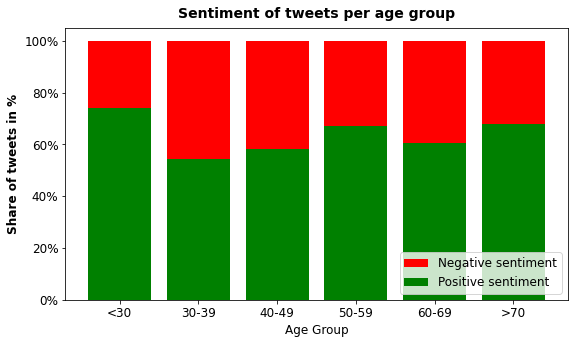

<Figure size 432x288 with 0 Axes>

In [9]:
# Plot stacked bar chart 

fig = plt.figure(1, (9,5))
ax = fig.add_subplot(1,1,1)
ax.bar(df1.index, [1,1,1,1,1,1], color='r', label='Negative sentiment')
ax.bar(df1.index, df1.Positive, color='g', label='Positive sentiment')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(loc="lower right", fontsize=12)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Share of tweets in %', fontsize=12, fontweight="bold")
ax.set_title('Sentiment of tweets per age group', fontsize=14, fontweight="bold", pad=10)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
fig.savefig('S_Tweets_Age.png', bbox_inches='tight') # See Visualizations
fig = plt.figure()

**Second plot: Bar chart with share of sentiment per gender**

In [10]:
# create crosstab 
pd.crosstab(df["Gender"], df["label"])

label,NEGATIVE,POSITIVE
Gender,,
m,46684,78866
w,27756,45124


In [11]:
# create crosstab with relative values
ct2 = pd.crosstab(df["Gender"], df["label"], normalize='index')
ct2

label,NEGATIVE,POSITIVE
Gender,,
m,0.371836,0.628164
w,0.380845,0.619155


In [12]:
# Save relative values from crosstab to dataframe
df2 = pd.DataFrame()
df2["Positive"] = ct2["POSITIVE"]
df2["Negative"] = ct2["NEGATIVE"]

df2

,Positive,Negative
Gender,,
m,0.628164,0.371836
w,0.619155,0.380845


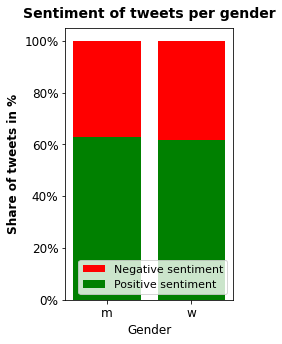

<Figure size 432x288 with 0 Axes>

In [13]:
# Plot stacked bar chart 

fig2 = plt.figure(1, (3,5))
ax2 = fig2.add_subplot(1,1,1)
ax2.bar(df2.index, [1,1], color='r', label='Negative sentiment')
ax2.bar(df2.index, df2.Positive, color='g', label='Positive sentiment')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.legend(loc="lower right", fontsize=11)
ax2.set_xlabel('Gender', fontsize=12)
ax2.set_ylabel('Share of tweets in %', fontsize=12, fontweight="bold")
ax2.set_title('Sentiment of tweets per gender', fontsize=14, fontweight="bold", pad=10)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
fig2.savefig("S_Tweets_Gender.png", bbox_inches='tight')# See visualizations
fig2 = plt.figure()

**Third plot: Stacked bar chart with share of sentiment per topic cluster (All, Corona, Brexit, ESG)**

In [14]:
# create crosstab
pd.crosstab(df["covid_hashtags"], df["label"])

label,NEGATIVE,POSITIVE
covid_hashtags,,
0,73889,123247
1,551,743


In [15]:
# create crosstab with relative values
ct2 = pd.crosstab(df["covid_hashtags"], df["label"], normalize='index')
ct2

label,NEGATIVE,POSITIVE
covid_hashtags,,
0,0.374812,0.625188
1,0.425811,0.574189


In [16]:
df_covid = df.loc[df['covid_hashtags'] == 1]
df_esg= df.loc[df['esg_hashtags'] == 1]
df_brexit= df.loc[df['brexit_hashtags'] == 1]

In [17]:
pos_covid = df_covid['pred_x'].sum()/len(df_covid)
pos_esg = df_esg['pred_x'].sum()/len(df_esg)
pos_brexit = df_brexit['pred_x'].sum()/len(df_brexit)
pos_general = df['pred_x'].sum()/len(df)

In [18]:
pos_covid

0.5741885625965997

In [19]:
pos_esg

0.7659574468085106

In [20]:
pos_brexit

0.43982494529540483

In [21]:
pos_general

0.6248551126341783

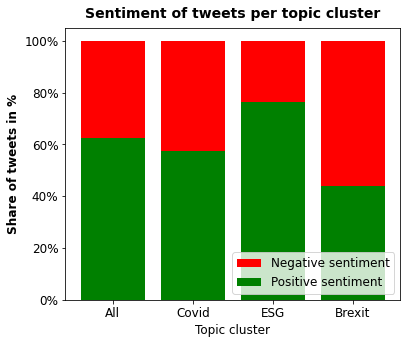

<Figure size 432x288 with 0 Axes>

In [22]:
# Plot stacked bar chart 

fig3 = plt.figure(1, (6,5))
ax3 = fig3.add_subplot(1,1,1)
ax3.bar(['All', 'Covid', 'ESG', 'Brexit'], [1,1,1,1], color='r', label='Negative sentiment')
ax3.bar(['All', 'Covid', 'ESG', 'Brexit'], [pos_general, pos_covid,pos_esg, pos_brexit], color='g', label='Positive sentiment')
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax3.legend(loc="lower right", fontsize=12)
ax3.set_xlabel('Topic cluster', fontsize=12)
ax3.set_ylabel('Share of tweets in %', fontsize=12, fontweight="bold")
ax3.set_title('Sentiment of tweets per topic cluster', fontsize=14,fontweight="bold", pad= 10)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=12)
fig3.savefig("S_Tweets_Topic.png", bbox_inches='tight') # See visualizations
fig3 = plt.figure()

**Fourth plot: Combining all 3 plots in one figure**

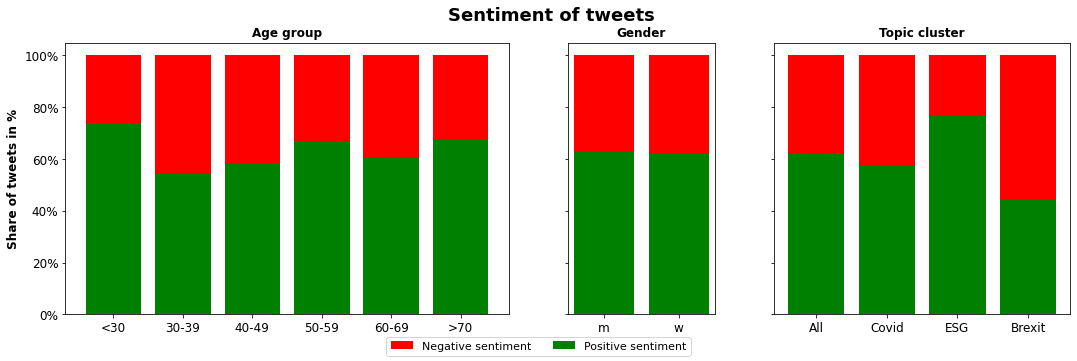

<Figure size 432x288 with 0 Axes>

In [23]:
f, (ax, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18,5), gridspec_kw={'width_ratios': [9, 3, 6]})

# Plot stacked bar chart 

# Left bar chart = age group
ax.bar(df1.index, [1,1,1,1,1,1], color='r', label='Negative sentiment')
ax.bar(df1.index, df1.Positive, color='g', label='Positive sentiment')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_title('Age group', fontsize=12, fontweight="bold")
ax.set_ylabel('Share of tweets in %', fontsize=12, fontweight="bold")
#ax.set_title('Per age group', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

#Middle bar chart = gender
ax2.bar(df2.index, [1,1], color='r')
ax2.bar(df2.index, df2.Positive, color='g')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.set_title('Gender', fontsize=12, fontweight="bold")
#ax2.set_title('Per gender', fontsize=14)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

#Right bar chart = topic cluster
ax3.bar(['All', 'Covid', 'ESG', 'Brexit'], [1,1,1,1], color='r')
ax3.bar(['All', 'Covid', 'ESG', 'Brexit'], [pos_general, pos_covid,pos_esg, pos_brexit], color='g')
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax3.set_title('Topic cluster', fontsize=12, fontweight="bold")
#ax3.set_title('Per topic cluster', fontsize=14)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=12)

f.suptitle("Sentiment of tweets", fontsize=18, fontweight="bold")
f.legend(loc="lower center", ncol = 2, fontsize=11)
f.savefig("S_Tweets_all.png", bbox_inches='tight') #See visualizations
f = plt.figure()

Conclusion:
- There are differences in age groups in terms of sentiments - however, no pattern can be dereived by eye
- There are no differences in sentimnent between gender
- The topic corona is quite similar to the overall sentiment, whereas ESG has a more positve sentiments and Brexit more negative ones

Could be interesting to check brexit or ESG per Age group

**Fifth plot: Stacked bar chart with share of sentiment per age group and for comparing ESG topic cluster**

In [24]:
# Check how many values per age group we have for topic cluster brexit
pd.crosstab(df_brexit["Age_Group"], df_brexit["label"]) # only 1 tweet in age group <30, therefore not chosen

label,NEGATIVE,POSITIVE
Age_Group,,
30-39,1,4
40-49,101,138
50-59,17,9
60-69,127,36
<30,1,0
>70,9,14


In [25]:
# Check how many values per age group we have for topic cluster esg
pd.crosstab(df_esg["Age_Group"], df_esg["label"])
#Subgroups are small but as this is only an illustrative example ok 

label,NEGATIVE,POSITIVE
Age_Group,,
30-39,5,14
40-49,67,302
50-59,37,88
60-69,89,161
<30,128,480
>70,4,35


In [26]:
# Save relative values from crosstab to dataframe
ct4 = pd.crosstab(df_esg["Age_Group"], df_esg["label"], normalize='index')

df4 = pd.DataFrame()
df4["Positive"] = ct4["POSITIVE"]
df4["Negative"] = ct4["NEGATIVE"]
df4 = df4.reindex(['<30', '30-39', '40-49', '50-59', '60-69', '>70'])
df4

,Positive,Negative
Age_Group,,
<30,0.789474,0.210526
30-39,0.736842,0.263158
40-49,0.818428,0.181572
50-59,0.704000,0.296000
60-69,0.644000,0.356000
>70,0.897436,0.102564


No handles with labels found to put in legend.


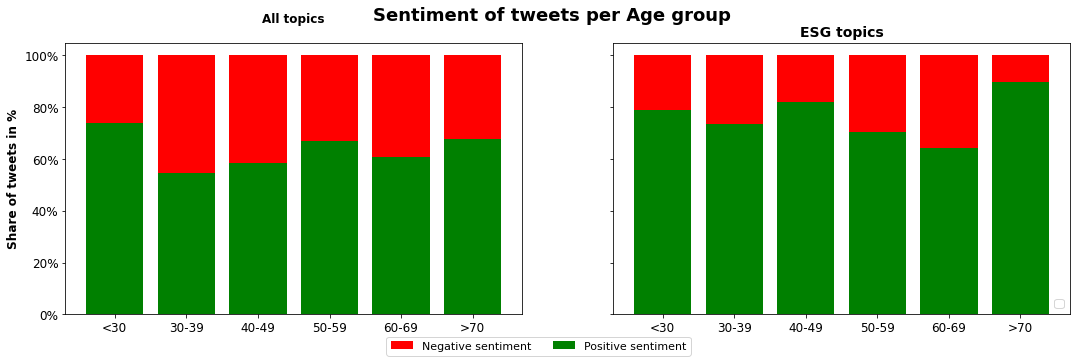

<Figure size 432x288 with 0 Axes>

In [27]:
f, (ax, ax4) = plt.subplots(1, 2, sharey=True, figsize=(18,5))

# Plot stacked bar chart 

# Left bar chart = age group
ax.bar(df1.index, [1,1,1,1,1,1], color='r', label='Negative sentiment')
ax.bar(df1.index, df1.Positive, color='g', label='Positive sentiment')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_title('All topics', fontsize=12, fontweight="bold", pad=20)
ax.set_ylabel('Share of tweets in %', fontsize=12, fontweight="bold")
#ax.set_title('Per age group', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax4.bar(df4.index, [1,1,1,1,1,1], color='r')
ax4.bar(df4.index, df4.Positive, color='g')
ax4.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax4.legend(loc="lower right", fontsize=12)
#ax4.set_xlabel('Age Group', fontsize=12)
#ax4.set_ylabel('Share of tweets', fontsize=12)
ax4.set_title('ESG topics', fontsize=14, fontweight="bold")
ax4.tick_params(axis='x', labelsize=12)
ax4.tick_params(axis='y', labelsize=12)

f.suptitle("Sentiment of tweets per Age group", fontsize=18, fontweight="bold")
f.legend(loc="lower center", ncol = 2, fontsize=11)
f = plt.figure()

Hard to compare - therefore, further plot with grouped bar char (bars next to each other for both topic groups) to be tested.

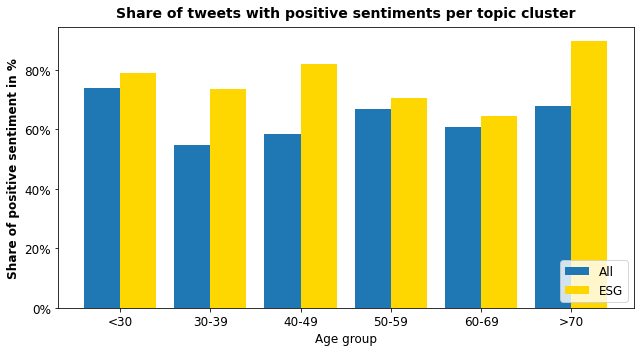

In [28]:
# Join bar charts in one plot (grouped bar plot)
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '>70']
x = np.arange(len(labels))
width = 0.4  # the width of the bars

fig = plt.figure(1, (9,5))
ax = fig.add_subplot(1,1,1)
rects1 = ax.bar(x - width/2, df1.Positive, width, label='All')
rects2 = ax.bar(x + width/2, df4.Positive, width, label='ESG', color='gold')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Share of positive sentiment in %', fontsize=12, fontweight="bold")
ax.set_xlabel('Age group', fontsize=12)
ax.set_title("Share of tweets with positive sentiments per topic cluster", fontsize=14, fontweight="bold", pad=10)

ax.set_xticklabels(['','<30', '30-39', '40-49', '50-59', '60-69', '>70'])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.legend()
ax.legend(loc="lower right", fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

fig.tight_layout()
fig.savefig("S_Tweets_ESG.png", bbox_inches='tight')#See visualizations
plt.show()

**Sixth plot: Comparing emotions per topic cluster**

In [29]:
df['emotion_label'].value_counts()

fear        67958
neutral     39575
joy         38983
surprise    20680
sadness     16594
anger       13476
disgust      1164
Name: emotion_label, dtype: int64

In [30]:
df_covid['emotion_label'].value_counts()

fear        1108
sadness       68
anger         57
joy           51
neutral        5
surprise       5
Name: emotion_label, dtype: int64

In [31]:
df_brexit['emotion_label'].value_counts()

fear        407
anger        19
joy          17
sadness      12
surprise      2
Name: emotion_label, dtype: int64

In [32]:
df_esg['emotion_label'].value_counts()

fear        1141
anger        116
joy           92
sadness       43
neutral        9
surprise       9
Name: emotion_label, dtype: int64

In [33]:
all_emotions = df['emotion_label'].value_counts(normalize=True)
covid_emotions = df_covid['emotion_label'].value_counts(normalize=True)
brexit_emotions = df_brexit['emotion_label'].value_counts(normalize=True)
esg_emotions = df_esg['emotion_label'].value_counts(normalize=True)

In [34]:
all_emotions

fear        0.342478
neutral     0.199441
joy         0.196457
surprise    0.104218
sadness     0.083626
anger       0.067913
disgust     0.005866
Name: emotion_label, dtype: float64

In [35]:
covid_emotions

fear        0.856260
sadness     0.052550
anger       0.044049
joy         0.039413
neutral     0.003864
surprise    0.003864
Name: emotion_label, dtype: float64

In [36]:
brexit_emotions

fear        0.890591
anger       0.041575
joy         0.037199
sadness     0.026258
surprise    0.004376
Name: emotion_label, dtype: float64

In [37]:
esg_emotions

fear        0.809220
anger       0.082270
joy         0.065248
sadness     0.030496
neutral     0.006383
surprise    0.006383
Name: emotion_label, dtype: float64

Decision: Skip 'Disgust' in visualization as this has overall only 0,5% occurence

In [38]:
fear = [all_emotions[0], covid_emotions[0], brexit_emotions[0], esg_emotions[0]]
anger = [all_emotions[5], covid_emotions[2], brexit_emotions[1], esg_emotions[1]]
joy = [all_emotions[2], covid_emotions[3], brexit_emotions[2], esg_emotions[2]]
sadness = [all_emotions[4], covid_emotions[1], brexit_emotions[3], esg_emotions[3]]
suprise = [all_emotions[3], covid_emotions[4], brexit_emotions[4], esg_emotions[4]]
neutral = [all_emotions[1], covid_emotions[5], 0, esg_emotions[5]]

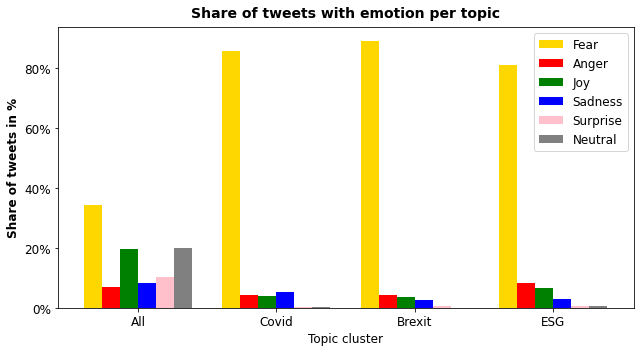

In [39]:
# Grouped bar chart for emotions per topic
labels = ['All', 'Covid', 'Brexit', 'ESG']
x = np.arange(len(labels))
width = 0.13  # the width of the bars

fig = plt.figure(1, (9,5))
ax = fig.add_subplot(1,1,1)
rects1 = ax.bar(x - 3*width+width/2, fear, width, label='Fear', color='gold')
rects2 = ax.bar(x - 2*width+width/2, anger, width, label='Anger', color='r')
rects3 = ax.bar(x - width/2, joy, width, label='Joy', color='g')
rects4 = ax.bar(x + width/2, sadness, width, label='Sadness', color='b')
rects5 = ax.bar(x + 2*width-width/2, suprise, width, label='Surprise', color='pink')
rects6 = ax.bar(x + 3*width-width/2, neutral, width, label='Neutral', color='grey' )               
                
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Share of tweets in %', fontsize=12, fontweight="bold")
ax.set_xlabel('Topic cluster', fontsize=12)
ax.set_title("Share of tweets with emotion per topic", fontsize=14, fontweight="bold", pad=10)

ax.set_xticks(range(0,4,1))
#ax.tick_params(axis=[0,1,2], labelsize=12)
ax.set_xticklabels(['All', 'Covid', 'Brexit', 'ESG'])
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.legend()
ax.legend(loc="upper right", fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

fig.tight_layout()
fig.savefig("E_Tweets_Topic_1.png", bbox_inches="tight")#See visualizations

plt.show()

As Fear is by far the most common emotion across all groups, the other ones are hard to compare - Therefore, another chart without fear will be created.

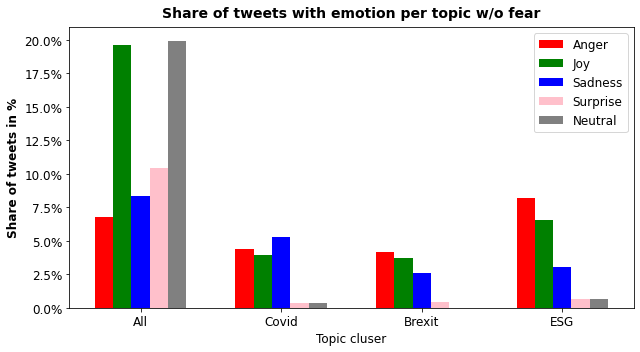

In [40]:
# Grouped bar chart for emotions per topic w/o fear
labels = ['All', 'Covid', 'Brexit', 'ESG']
x = np.arange(len(labels))
width = 0.13  # the width of the bars

fig = plt.figure(1, (9,5))
ax = fig.add_subplot(1,1,1)
rects2 = ax.bar(x - 2*width, anger, width, label='Anger', color='r')
rects3 = ax.bar(x - width, joy, width, label='Joy', color='g')
rects4 = ax.bar(x , sadness, width, label='Sadness', color='b')
rects5 = ax.bar(x + width, suprise, width, label='Surprise', color='pink')
rects6 = ax.bar(x + 2*width, neutral, width, label='Neutral', color='grey' )               
                
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Share of tweets in %', fontsize=12, fontweight="bold")
ax.set_xlabel('Topic cluser', fontsize=12)
ax.set_title("Share of tweets with emotion per topic w/o fear", fontsize=14, fontweight="bold", pad=10)

ax.set_xticks(range(0,4,1))
#ax.tick_params(axis=[0,1,2], labelsize=12)
ax.set_xticklabels(['All', 'Covid', 'Brexit', 'ESG'])
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.legend()
ax.legend(loc="upper right", fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

fig.tight_layout()
fig.savefig("E_Tweets_Topic_2.png", bbox_inches="tight")#See visualizations

plt.show()

**Seventh plot: Emotions compared per age group in bar chart**

In [41]:
pd.crosstab(df["Age_Group"], df["emotion_label"])

emotion_label,anger,disgust,fear,joy,neutral,sadness,surprise
Age_Group,,,,,,,
30-39,1883,170,6016,2657,2905,1438,1782
40-49,3702,285,17864,10303,13222,4909,7555
50-59,2490,291,15783,11714,8984,3884,4810
60-69,3213,267,15359,7260,9183,3921,3805
<30,662,30,3836,1834,1314,698,650
>70,1526,121,9100,5215,3967,1744,2078


In [42]:
pd.crosstab(df["Age_Group"], df["emotion_label"], normalize='index')

emotion_label,anger,disgust,fear,joy,neutral,sadness,surprise
Age_Group,,,,,,,
30-39,0.111744,0.010088,0.357011,0.157676,0.172393,0.085336,0.105750
40-49,0.064004,0.004927,0.308852,0.178129,0.228596,0.084872,0.130619
50-59,0.051923,0.006068,0.329114,0.244266,0.187338,0.080991,0.100300
60-69,0.074707,0.006208,0.357120,0.168806,0.213518,0.091169,0.088472
<30,0.073360,0.003324,0.425089,0.203236,0.145612,0.077349,0.072030
>70,0.064250,0.005095,0.383142,0.219570,0.167025,0.073428,0.087491


In [43]:
ct = pd.crosstab(df["Age_Group"], df["emotion_label"], normalize='index')

df5 = pd.DataFrame()
df5["anger"] = ct["anger"]
df5["fear"] = ct["fear"]
df5["joy"] = ct["joy"]
df5["neutral"] = ct["neutral"]
df5["sadness"] = ct["sadness"]
df5["surprise"] = ct["surprise"]
df5 = df5.reindex(['<30', '30-39', '40-49', '50-59', '60-69', '>70'])
df5

,anger,fear,joy,neutral,sadness,surprise
Age_Group,,,,,,
<30,0.073360,0.425089,0.203236,0.145612,0.077349,0.072030
30-39,0.111744,0.357011,0.157676,0.172393,0.085336,0.105750
40-49,0.064004,0.308852,0.178129,0.228596,0.084872,0.130619
50-59,0.051923,0.329114,0.244266,0.187338,0.080991,0.100300
60-69,0.074707,0.357120,0.168806,0.213518,0.091169,0.088472
>70,0.064250,0.383142,0.219570,0.167025,0.073428,0.087491


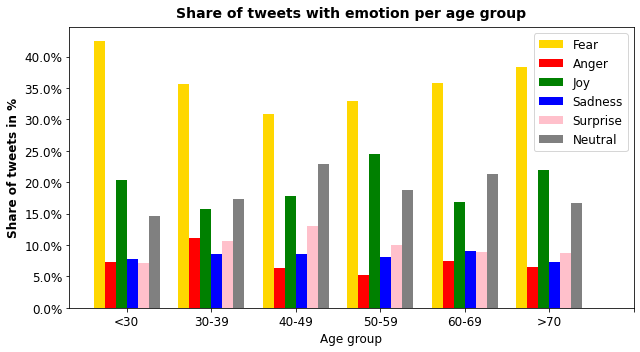

In [44]:
# Grouped bar chart for emotions per age group
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '>70']
x = np.arange(len(labels))
width = 0.13  # the width of the bars

fig = plt.figure(1, (9,5))
ax = fig.add_subplot(1,1,1)
rects1 = ax.bar(x - 3*width+width/2, df5.fear, width, label='Fear', color='gold')
rects2 = ax.bar(x - 2*width+width/2, df5.anger, width, label='Anger', color='r')
rects3 = ax.bar(x - width/2, df5.joy, width, label='Joy', color='g')
rects4 = ax.bar(x + width/2, df5.sadness, width, label='Sadness', color='b')
rects5 = ax.bar(x + 2*width-width/2, df5.surprise, width, label='Surprise', color='pink')
rects6 = ax.bar(x + 3*width-width/2, df5.neutral, width, label='Neutral', color='grey' )               
                
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Share of tweets in %', fontsize=12, fontweight="bold")
ax.set_xlabel('Age group', fontsize=12)
ax.set_title("Share of tweets with emotion per age group", fontsize=14, fontweight="bold", pad=10)

ax.set_xticks(range(0,7,1))
#ax.tick_params(axis=[0,1,2], labelsize=12)
ax.set_xticklabels(['<30', '30-39', '40-49', '50-59', '60-69', '>70'])
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.legend()
ax.legend(loc="upper right", fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

fig.tight_layout()
fig.savefig("E_Tweets_Age.png", bbox_inches='tight')#See visualizations

plt.show()

**Eighth plot: Emotions per Gender in Bar chart and spider chart**

In [45]:
pd.crosstab(df["Gender"], df["emotion_label"])

emotion_label,anger,disgust,fear,joy,neutral,sadness,surprise
Gender,,,,,,,
m,8051,865,39403,25290,27817,9806,14318
w,5425,299,28555,13693,11758,6788,6362


In [46]:
pd.crosstab(df["Gender"], df["emotion_label"], normalize='index')

emotion_label,anger,disgust,fear,joy,neutral,sadness,surprise
Gender,,,,,,,
m,0.064126,0.006890,0.313843,0.201434,0.221561,0.078104,0.114042
w,0.074437,0.004103,0.391808,0.187884,0.161334,0.093139,0.087294


In [47]:
ct = pd.crosstab(df["Gender"], df["emotion_label"], normalize='index')

df6 = pd.DataFrame()
df6["anger"] = ct["anger"]
df6["fear"] = ct["fear"]
df6["joy"] = ct["joy"]
df6["neutral"] = ct["neutral"]
df6["sadness"] = ct["sadness"]
df6["surprise"] = ct["surprise"]
df6

,anger,fear,joy,neutral,sadness,surprise
Gender,,,,,,
m,0.064126,0.313843,0.201434,0.221561,0.078104,0.114042
w,0.074437,0.391808,0.187884,0.161334,0.093139,0.087294


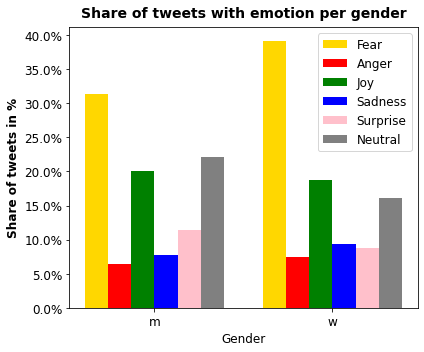

In [48]:
# Grouped bar chart for emotions per age group
labels = ["m","w"]
x = np.arange(len(labels))
width = 0.13  # the width of the bars

fig = plt.figure(1, (6,5))
ax = fig.add_subplot(1,1,1)
rects1 = ax.bar(x - 3*width+width/2, df6.fear, width, label='Fear', color='gold')
rects2 = ax.bar(x - 2*width+width/2, df6.anger, width, label='Anger', color='r')
rects3 = ax.bar(x - width/2, df6.joy, width, label='Joy', color='g')
rects4 = ax.bar(x + width/2, df6.sadness, width, label='Sadness', color='b')
rects5 = ax.bar(x + 2*width-width/2, df6.surprise, width, label='Surprise', color='pink')
rects6 = ax.bar(x + 3*width-width/2, df6.neutral, width, label='Neutral', color='grey' )               
                
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Share of tweets in %', fontsize=12, fontweight="bold")
ax.set_xlabel('Gender', fontsize=12)
ax.set_title("Share of tweets with emotion per gender", fontsize=14, fontweight="bold", pad=10)

ax.set_xticks(range(0,2,1))
#ax.tick_params(axis=[0,1,2], labelsize=12)
ax.set_xticklabels(["m","w"])
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.legend()
ax.legend(loc="upper right", fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

fig.tight_layout()
fig.savefig("E_Tweets_Gender_1.png", bbox_inches='tight')#See visualizations
plt.show()

In [49]:
df6.columns

Index(['anger', 'fear', 'joy', 'neutral', 'sadness', 'surprise'], dtype='object')

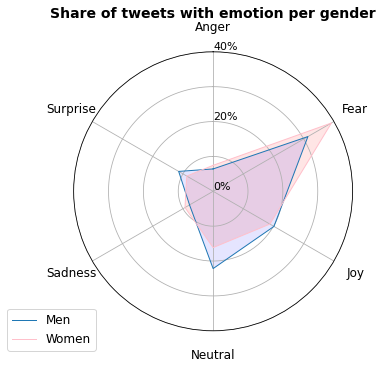

In [50]:
# Spider chart
# ------- PART 1: Create background
 
# number of variable
categories=list(['Anger', 'Fear', 'Joy', 'Neutral', 'Sadness', 'Surprise'])
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure(1, (5,8))
ax = fig.add_subplot(111, polar=True)
#ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.1,0.2,0.3, 0.4], ["0%", "", "20%", "", "40%"], color="black", size=11)
ax.tick_params(direction='out', pad=14)
plt.ylim(0,0.4)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df6.values[0].flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Men")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df6.values[1].flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Women", color="pink")
ax.fill(angles, values, 'r', alpha=0.1)

ax.set_title("Share of tweets with emotion per gender", fontsize=14, fontweight="bold", pad=20)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=12)

# Show the graph
fig.savefig("E_Tweets_Gender_2.png", bbox_inches='tight')#See visualizations
plt.show()